In [2]:
import tensorflow as tf
from tensorflow import keras

#libraries
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#importing datasets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print('Training images:{} '.format(train_images.shape))

Training images:(60000, 28, 28) 


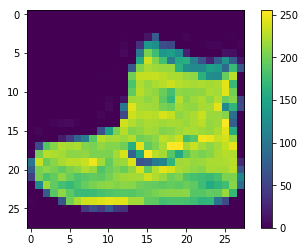

In [5]:
#Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [6]:
#scale these values to a range of 0 to 1, cast the datatype of the image components from an integer to a float, and divide by 255.
#training set and the testing set are preprocessed in the same way:
train_images=train_images / 255.0
test_images=test_images / 255.0

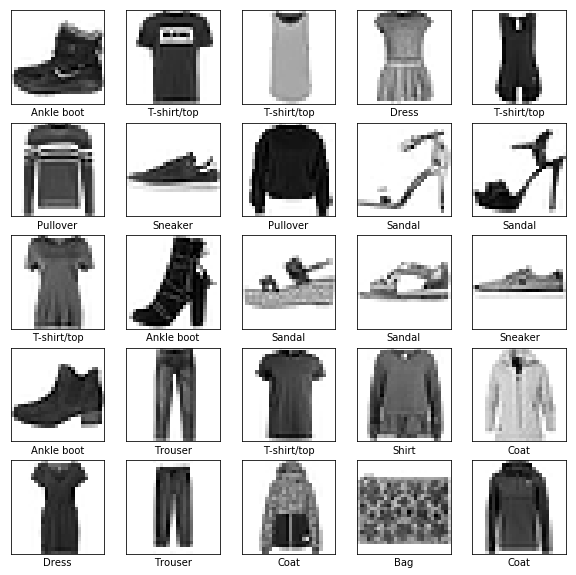

In [7]:
#Display the first 25 images from the training set
#display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [9]:
#Model building-neural network
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), #transforming the 2d array(28*28) to 1d array 28*28=784 pixels
        keras.layers.Dense(128, activation = tf.nn.relu), #128 nodes
        keras.layers.Dense(10, activation = tf.nn.softmax) #10 probability scores outputs sum to 1
    ])
#Complie the model
    optimizer = tf.train.AdamOptimizer() 
    model.compile(loss='sparse_categorical_crossentropy', #how accurate the model is during training. 
                  optimizer=optimizer, #how the model is updated based on the data it sees and its loss function.
                  metrics=['accuracy']) #Metrics —Used to monitor the training and testing steps.
                                                #accuracy, the fraction of the images that are correctly classified.
    return model

model=build_model()


In [8]:
#Train the model: the model is "fit" to the training data
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.4955 - acc: 0.8267
Epoch 2/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.3733 - acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3387 - acc: 0.8749
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.3118 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.2920 - acc: 0.8914


In [11]:
#evaluate accuracy：Returns the loss value & metrics values for the model in test mode.
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test_accuracy:', test_acc)
#Overfitting is when a machine learning model performs worse on new data than on their training data.

10000/10000 [==============================] - 1s 55us/step
Test_accuracy: 0.8729


In [23]:
#make predictions
predictions = model.predict(test_images)
print(predictions[0])
#A prediction is an array of 10 numbers. 
#These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing.
print(np.argmax(predictions[0]))
print(test_labels[0])


[1.1958324e-05 7.3088580e-09 5.4049383e-07 1.8776724e-08 5.3097697e-06
 1.7267881e-01 1.7477174e-05 1.0447740e-01 3.5138790e-05 7.2277331e-01]
9
9


In [26]:
#graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

In [45]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

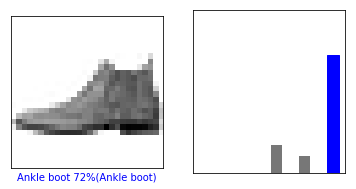

In [50]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

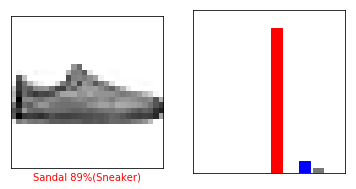

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

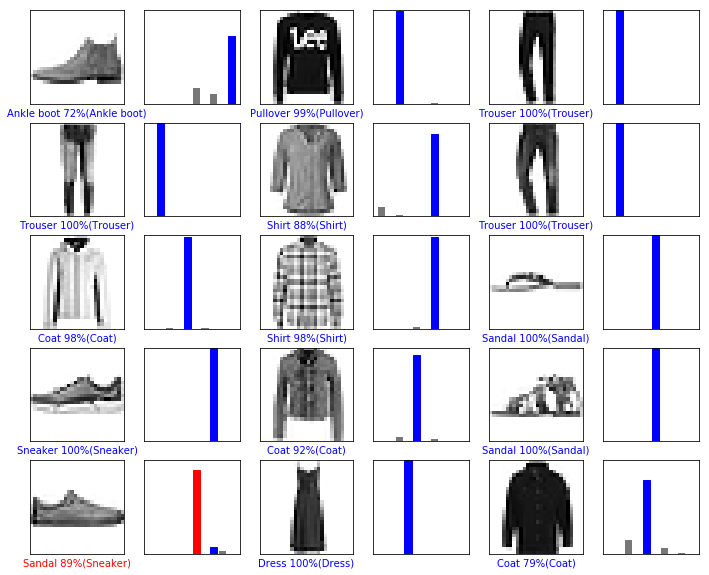

In [55]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [58]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
#Grab a image from test set

img = test_images[0]
print(img.shape)

# Add to a batch
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [60]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1958317e-05 7.3088877e-09 5.4049400e-07 1.8776730e-08 5.3097765e-06
  1.7267859e-01 1.7477179e-05 1.0447743e-01 3.5138801e-05 7.2277355e-01]]


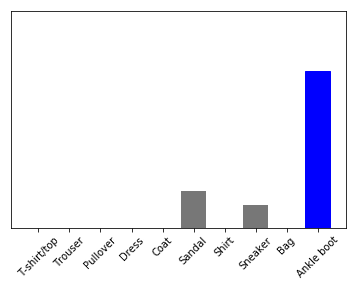

In [61]:
plot_value_array(0, predictions_single, test_labels)

plot = plt.xticks(range(10), class_names, rotation = 45)

In [62]:
#model.predict 
np.argmax(predictions_single[0])

9